<a href="https://colab.research.google.com/github/alifabdullah/python-/blob/main/Post_Pruning_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [117]:
df = pd.read_csv('/content/iris_data.csv')

In [118]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [120]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [121]:
x = df.drop('Species',axis=1)
y = df['Species']

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=42)

In [123]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [124]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [125]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 20, 'splitter': 'random'}


In [126]:
df.isnull().sum()


,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [127]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[0] <= 100.5\ngini = 0.666\nsamples = 135\nvalue = [44, 44, 47]'),
 Text(0.4, 0.5, 'x[4] <= 0.8\ngini = 0.5\nsamples = 88\nvalue = [44, 44, 0]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 47\nvalue = [0, 0, 47]'),
 Text(0.7, 0.6666666666666667, '  False')]

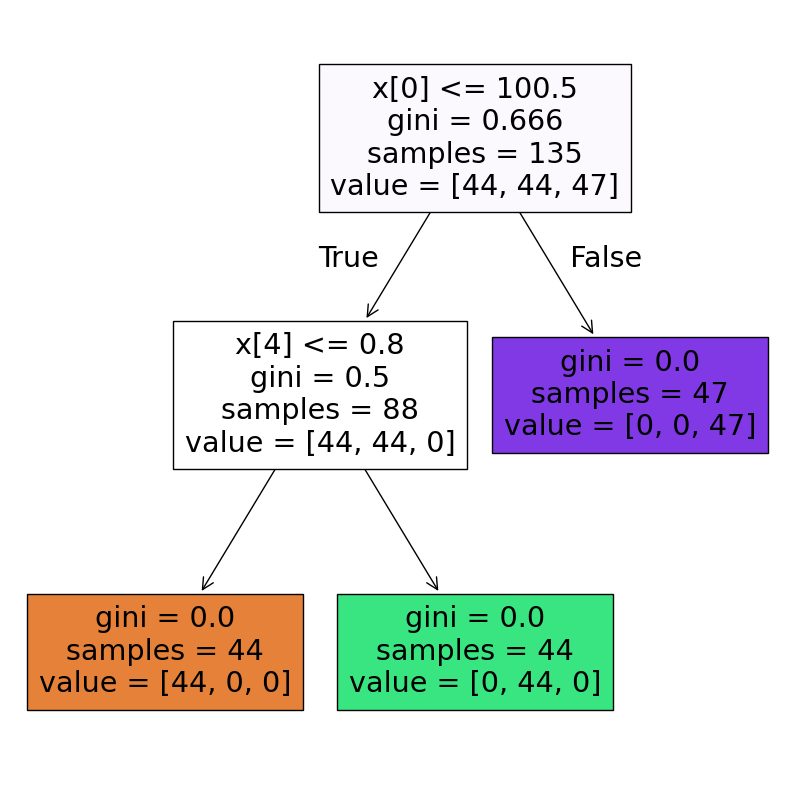

In [128]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dt,filled=True)

In [129]:
dt_tuned = DecisionTreeClassifier(criterion='gini', max_depth=None, splitter='best', random_state=42)
dt_tuned.fit(x_train, y_train)
y_pred_tuned = dt_tuned.predict(x_test)
print("Accuracy of tuned model:", accuracy_score(y_test, y_pred_tuned))

Accuracy of tuned model: 1.0


In [130]:
y_pred = dt.predict(x_test)

In [131]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0])

In [132]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [133]:
accuracy_score(y_test,y_pred)

1.0

In [134]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_tuned, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.83333333 1.         1.         1.         0.83333333]
Mean cross-validation score: 0.9333333333333333
